## Checking results from batch emcee run 

N. Gosnell 4-26-2018

We want to check out the results from orders that have completed on Natalie's computer. 

Natalie doesn't have the default Jupyter config that Gully does, so we have to import stuff:

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

As of 4-26-18, two orders are done. 

Order 103 took 51.3 hours to complete 5000 steps. Order 106 took 76 hours to complete 5000 steps. Natalie had to use her computer more during the 106 run, so the delay is probably due to CPU load being shared between normal activities and emcee. 

Let's read in 103 first:

In [6]:
ws = np.load("../sf/m103/output/mix_emcee/run01/emcee_chain.npy")

In [7]:
label = ["$T_{\mathrm{eff}}$", "$\log{g}$", "$[\mathrm{Fe}/\mathrm{H}]$","$v_z$", "$v\sin{i}$", "$\log{\Omega}$", 
         "$T_{\mathrm{eff, 2}}$", "$\log{\Omega_2}$", "$c^1$", "$c^2$", "$c^3$", "sigAmp", "logAmp", "$l$"]

Check to make sure there are actually 5000 entries:

In [8]:
mask = ws[0, :, 0] != 0
mask.sum()

5000

In [9]:
#if there aren't:

#ws_old = ws
#ws = ws[:, 0:mask.sum(), :]

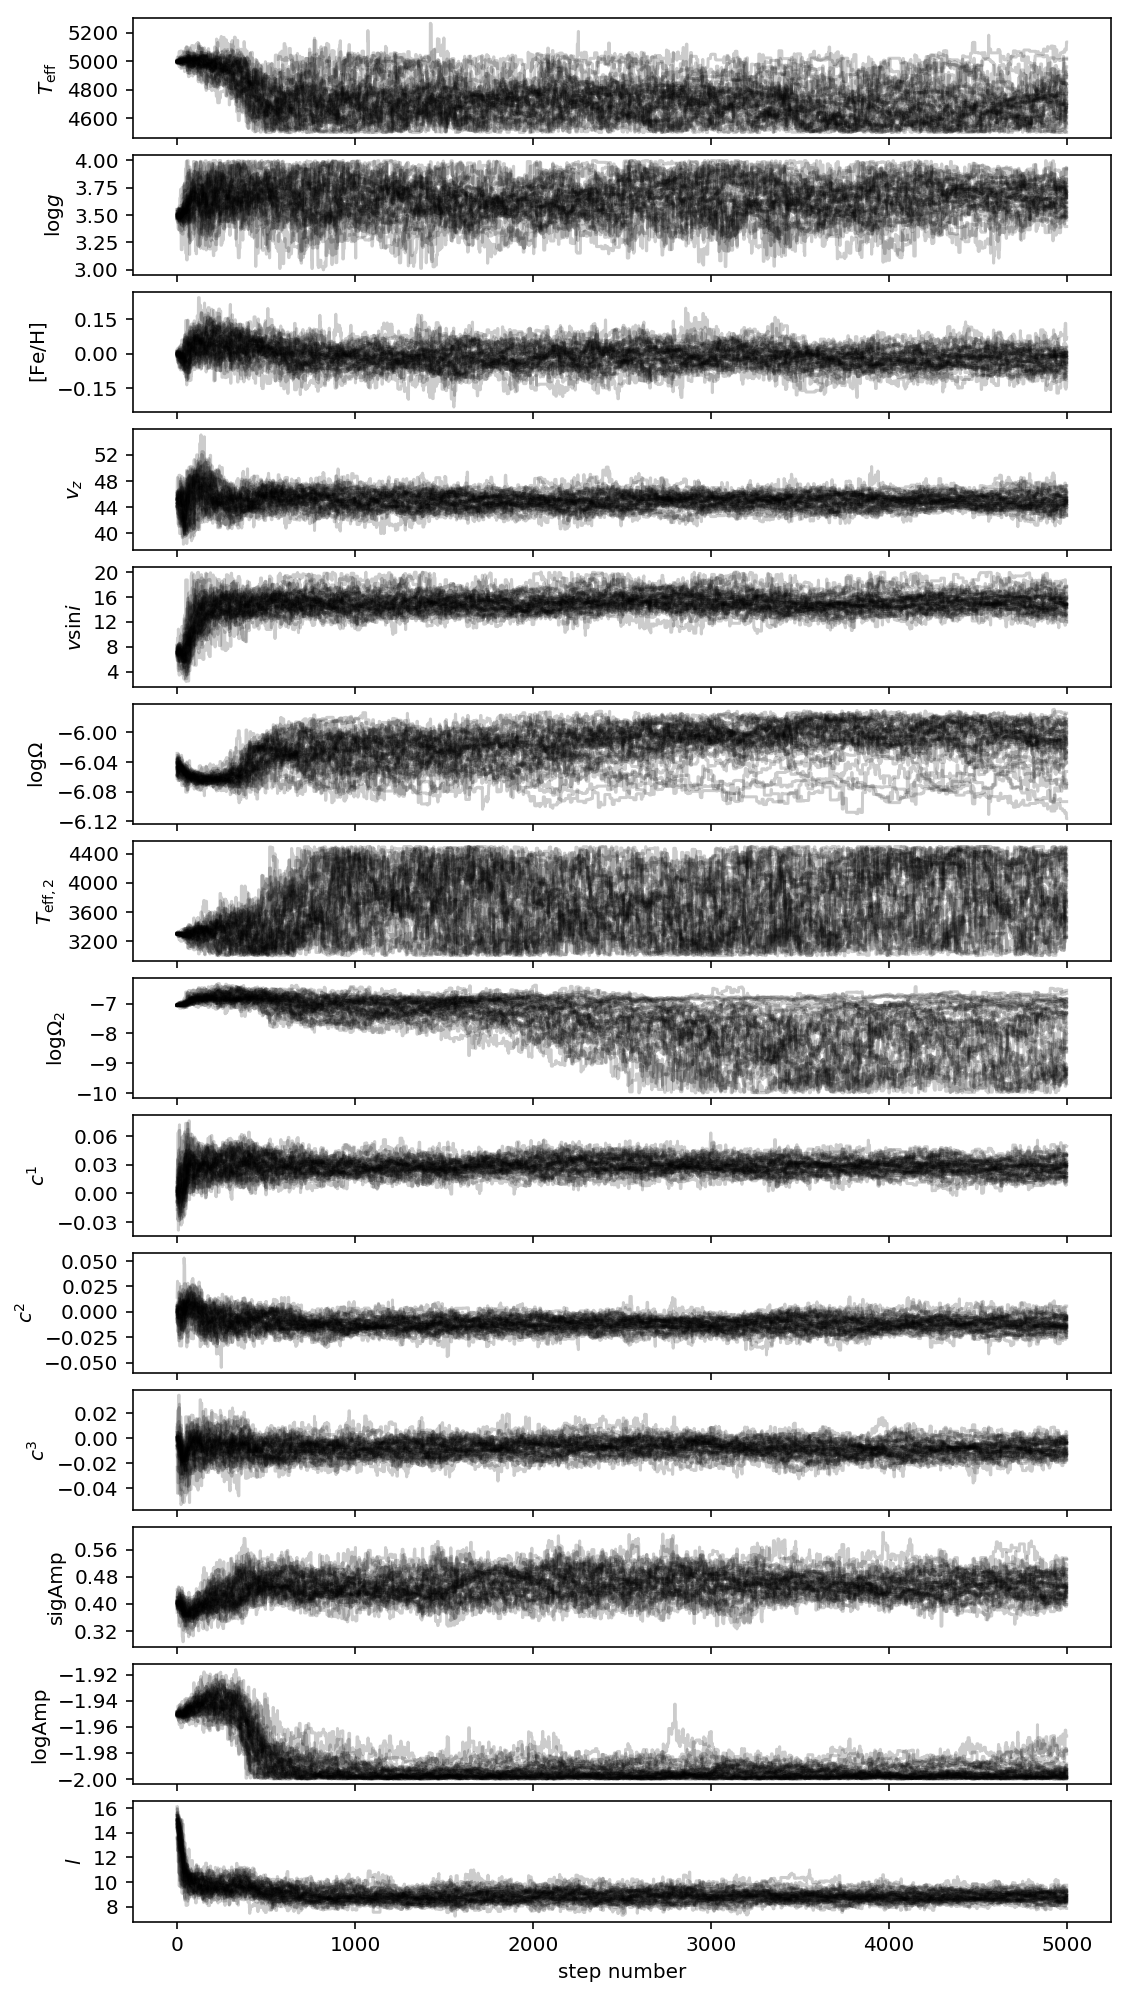

In [17]:
fig, axes = plt.subplots(14, 1, sharex=True, figsize=(8, 14))
for i in range(0, 14, 1):
    axes[i].plot(ws[:, :, i].T, color="k", alpha=0.2)
    axes[i].yaxis.set_major_locator(MaxNLocator(5))
    axes[i].set_ylabel(label[i])

axes[13].set_xlabel("step number")

fig.tight_layout(h_pad=0.0)
plt.savefig('../results/figs/subsub_m103.png', dpi=300, bbox_inches='tight')

Are we restricting the log(Amp) to be greater than -2? Looks like that's hitting a floor.

Seems like it's burned in around 2500. Not sure if we're supposed to be more careful here...

In [11]:
burned = ws[:, 2500:,:]
xs, ys, zs = burned.shape
fc = burned.reshape(xs*ys, zs)
nx, ny = fc.shape

I'm not going to make corner plots right now. But let's see about the filling factor

In [13]:
fc.shape

(100000, 14)

In [14]:
f_omega = 10**fc[:, 7] / (10**fc[:, 5] + 10**fc[:,7])

/Users/ngosnell/anaconda3/envs/astroconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(0, 0.4)

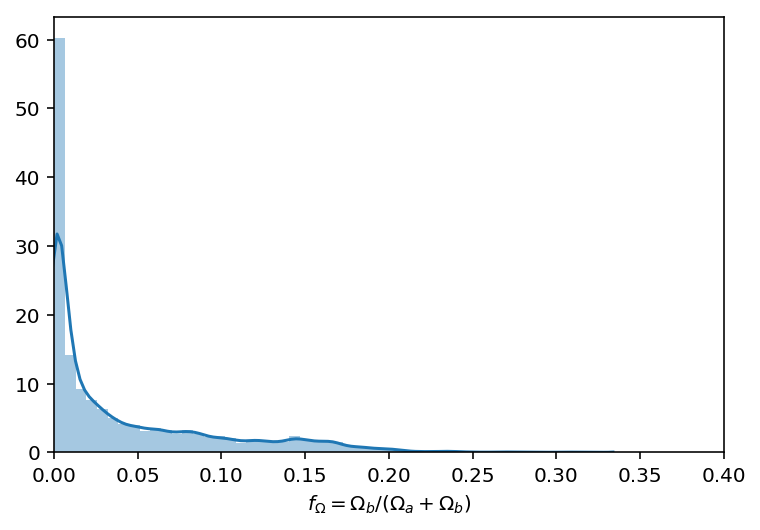

In [18]:
sns.distplot(f_omega)
plt.xlabel('$f_{\Omega} = \Omega_b/(\Omega_a + \Omega_b)$')
plt.xlim(0, 0.4)

Not too promising, yet. Now let's look at order 106:

In [19]:
ws = np.load("../sf/m106/output/mix_emcee/run01/emcee_chain.npy")

In [20]:
mask = ws[0, :, 0] != 0
mask.sum()

5000

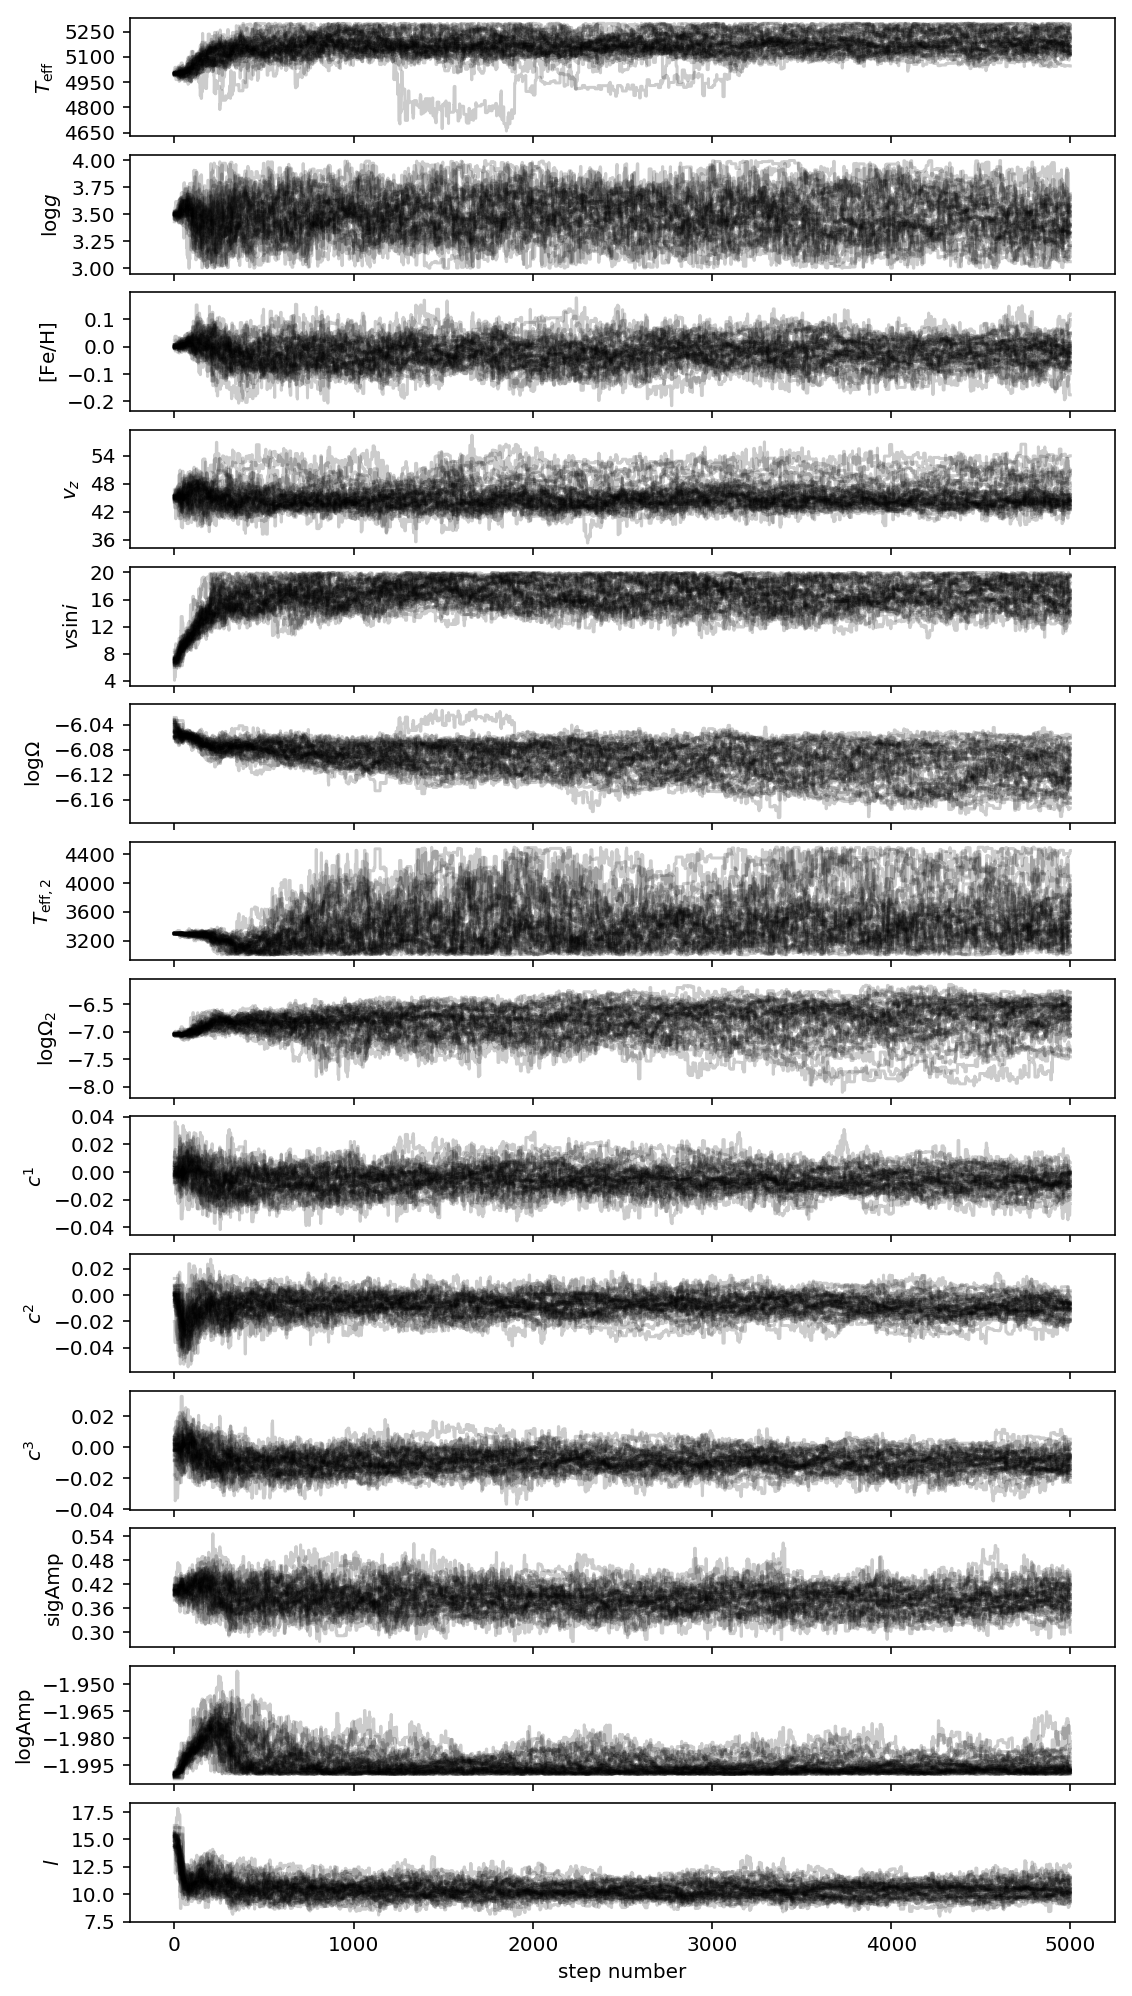

In [21]:
fig, axes = plt.subplots(14, 1, sharex=True, figsize=(8, 14))
for i in range(0, 14, 1):
    axes[i].plot(ws[:, :, i].T, color="k", alpha=0.2)
    axes[i].yaxis.set_major_locator(MaxNLocator(5))
    axes[i].set_ylabel(label[i])

axes[13].set_xlabel("step number")

fig.tight_layout(h_pad=0.0)
plt.savefig('../results/figs/subsub_m106.png', dpi=300, bbox_inches='tight')

Are we hitting the same log(Amp) floor here?

In [22]:
burned = ws[:, 2000:,:]
xs, ys, zs = burned.shape
fc = burned.reshape(xs*ys, zs)
nx, ny = fc.shape

In [23]:
f_omega = 10**fc[:, 7] / (10**fc[:, 5] + 10**fc[:,7])

/Users/ngosnell/anaconda3/envs/astroconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(0, 1)

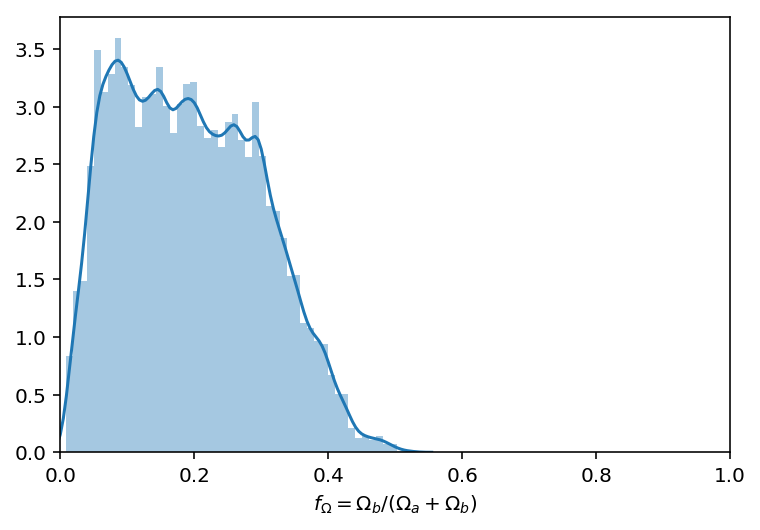

In [25]:
sns.distplot(f_omega)
plt.xlabel('$f_{\Omega} = \Omega_b/(\Omega_a + \Omega_b)$')
plt.xlim(0, 1)

Interesting! Potentially something happening here!

Stay tuned for more...